# Logistic Regression from Scratch in Python

In the Jupyter Notebook, a logistic regression machine learning algorithm using Python programming is implemented from scratch for educational purposes. The logistic regression model makes predictions about if a person's has heart disease or not. The ScikitLearn machine learning library with NumPy, Matplotlib, Pandas and Scipy has been used to pre-process the data and evaluate performance metrics from the logistic regression model. The ScikitLearn logistic regression algorithm has been implemented at the end of the Jupyter Notebook to compare the evaluation test results against the Python logistic regression algorithm.

A larger dataset than the heart disease binary classification dataset may return missing values (NaN) as output predictions over other logistic regression algorithms written in software using well-optimised machine learning libraries such as ScikitLearn, Pytorch or TensorFlow. Larger datasets require optimised data loading software that is not added to the logistic regression model object to reduce code complexity for educational purposes.

In [1]:
# NumPy library import
import numpy as np

# Logistic Regression Python class object
class LogisticRegression():

    """LogisticRegression (LR) model in Python from scratch.
       The code comments throughout the LR model explain the code.
       Constructor Input Parameters:
       Learning Rate (lr), default setting 0.001
       Number of Iterations (n_iters), default setting 1000
       lr and n_iters can be set as hyperparameters to train the 
       Logistic Regression model.
    """

    # Logistic Regression class constructor
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr            # Learning rate
        self.n_iters = n_iters  # Number of iterations (n_iters)
        self.weights = None     # Weight parameters
        self.bias = None        # Bias parameter

    # Python fit method to fit the data to the model during training
    def fit(self, X, y):

        """Python fit method to fit the training data to the LR model.
           The training data is passed through the LR model in the forward
           and backward pass directions because gradient descent adjusts the
           weight parameters during training to train the model.
           Python Method Input Parameters:
           x: features from the dataset
           y: prediction targets from the dataset
       """

        # Stores the shape of the dataset features in the n_samples and n_features Python variables
        n_samples, n_features = X.shape

        # Initialises the weight parameters and the bias during training
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop to control the number of training iterations
        for _ in range(self.n_iters):

            # Stores the training predictions in the linear_pred Python variable
            linear_pred = np.dot(X, self.weights) + self.bias

            # Stores the predictions after being passes to the Sigmoid activation function
            # in the predictions Python variable
            predictions = self.sigmoid(linear_pred)

            # Calcualtes the partial derivatives for the weights (dw) and the bias (db)
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Updates the weights and bias parameters during training
            self.weights = self.weights - self.lr * dw
            self.bias - self.lr * db

    # Predict Python method to make predictions in inference mode at test time
    def predict(self, X):

        """Python predict method to run the test data through the model in the 
           forward pass direction only during inference mode.
           Python Method Input Parameter:
           X: features from the dataset
        """

        # Stores the inference mode predictions in the linear_pred Python variable
        linear_pred = np.dot(X, self.weights) + self.bias

        # Stores the predictions after being passes to the Sigmoid activation function
        # in the y_pred Python variable
        y_pred = self.sigmoid(linear_pred)

        # List comprehension to add all the class predictions to a Python list
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred

    # Sigmoid activation function Pyhton method with NumPy
    def sigmoid(self, x):

        """Sigmoid activation function to classify examples from the dataset.
            If the probalistic value is from 0.0 to 0.49 the example bleongs to class 0.
            If the probalistic value is from 0.5 to 1 the example bleongs to class 1.
            Python Method Input Parameters:
            x: features from the dataset
        """

        # Computes and returns the result of the Sigmoid activation function
        return 1 / (1 + np.exp(-x))

# 2. Load the Dataset

Dataset Available from Kaggle:

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [2]:
# Imports the Pandas library to use in the Jupyter Notebook
import pandas as pd

# Load the data to the Jupyter Notebook
df = pd.read_csv('./dataset/heart.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
# Seperate the target values from the dataset using the Pandas Pop method
y = df.pop('target')

y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [4]:
# Displays the dataset features X to the screen
X = df

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


# 3. Normalise the Data

In [5]:
# Convert column names to a list
list_numerical = X.columns.tolist()

list_numerical

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [6]:
# Python method to normalise the features X of the dataset 
def get_scale(list_numerical, X):
    
    # Import the StandardScaler object from ScikitLearn to normalise the data
    from sklearn.preprocessing import StandardScaler
    
    # Creates the StandardScaler object from ScikitLearn
    scaler = StandardScaler().fit(X[list_numerical]) 

    # Fits the normalisation to the dataset features X
    X[list_numerical] = scaler.transform(X[list_numerical])

    # Returns the normalised dataset features X
    return X

In [7]:
# Calls the get_scale Python method to normalise the dataset features X
X = get_scale(list_numerical, X)

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122


# 4. Train Test Split

In [8]:
# Imports the train test split method from ScikitLearn
from sklearn.model_selection import train_test_split

# Carry out a train, test split from ScikitLearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prints out the X_train features to the screen
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,-0.599275,0.661504,1.027618,-0.777449,-1.881036,-0.418878,-1.004049,-1.005203,-0.712287,-0.231177,0.995433,2.179817,-0.522122
137,1.054918,-1.511706,-0.915755,2.763755,1.531978,-0.418878,0.891255,0.212479,1.403928,-0.912329,0.995433,-0.731971,-0.522122
534,-0.047877,-1.511706,1.027618,-1.348611,0.407235,-0.418878,-1.004049,0.777832,-0.712287,-0.912329,0.995433,-0.731971,-0.522122
495,0.503520,0.661504,-0.915755,0.193526,-0.232705,-0.418878,0.891255,0.516900,-0.712287,-0.486609,-0.624121,-0.731971,1.089852
244,-0.378716,0.661504,1.027618,-0.377636,-0.019392,2.387330,-1.004049,0.734343,-0.712287,1.131129,-0.624121,-0.731971,-0.522122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-1.481512,0.661504,1.027618,-0.092055,-0.620548,-0.418878,-1.004049,0.821321,-0.712287,0.790552,-0.624121,-0.731971,-0.522122
71,0.724079,0.661504,-0.915755,0.479107,-0.756293,-0.418878,-1.004049,-0.483339,1.403928,0.705408,0.995433,0.238625,1.089852
106,-0.378716,0.661504,-0.915755,0.479107,1.027782,-0.418878,0.891255,1.038764,1.403928,0.449976,0.995433,-0.731971,1.089852
270,-1.260953,0.661504,-0.915755,-1.234378,-0.678724,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,-0.731971,1.089852


In [9]:
# Prints out the y_train targets to the screen
y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

In [10]:
# Prints out the X_test features to the screen
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,0.834359,-1.511706,-0.915755,-0.434752,-0.717508,-0.418878,0.891255,0.603877,-0.712287,-0.912329,0.995433,-0.731971,-0.522122
359,-0.158157,-1.511706,1.027618,-0.206287,-0.581764,-0.418878,-1.004049,-1.483579,-0.712287,-0.912329,0.995433,-0.731971,-3.746070
447,0.062402,0.661504,-0.915755,1.621431,0.833861,-0.418878,-1.004049,-0.178919,1.403928,-0.231177,-0.624121,0.238625,1.089852
31,-0.488996,-1.511706,0.055931,-0.663216,-0.038784,-0.418878,0.891255,0.560389,-0.712287,0.024256,0.995433,-0.731971,-0.522122
621,-0.709555,0.661504,-0.915755,-0.092055,0.193921,2.387330,-1.004049,0.038525,1.403928,-0.912329,0.995433,1.209221,1.089852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,1.496036,0.661504,1.027618,-0.777449,0.601156,-0.418878,0.891255,0.082013,-0.712287,-0.060888,0.995433,0.238625,1.089852
796,-1.481512,0.661504,0.055931,0.193526,-0.833861,-0.418878,0.891255,-0.744271,-0.712287,-0.912329,-0.624121,-0.731971,-2.134096
644,-1.150673,0.661504,1.027618,-0.663216,-0.387842,-0.418878,0.891255,0.864809,-0.712287,-0.912329,0.995433,-0.731971,-0.522122
404,0.724079,0.661504,-0.915755,0.479107,-0.756293,-0.418878,-1.004049,-0.483339,1.403928,0.705408,0.995433,0.238625,1.089852


In [11]:
# Prints out the y_test targets to the screen
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

# 5. Train the Logistic Regression Model

In [12]:
# Creating the LogisticRegression class object
model = LogisticRegression()

# Train the model with the fit method
model.fit(X_train, y_train)

# 6. Make Predictions on the Test Dataset

In [13]:
# Makes predictions on the test dataset X_test
y_pred = model.predict(X_test)

y_pred

[1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0]

In [14]:
# Prints out the y_test variable to the screen
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [15]:
# Flattens the y_test 2D array to 1D and stores it in the y variable
y = y_test.values.flatten()

y

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

# 7. Evaluate Classification Performance Metrics

In [16]:
from sklearn.metrics import accuracy_score
        
# Calls the accuracy method from ScikitLearn
acc = accuracy_score(y_pred, y_test)

# Prints out the accuracy score of the Logistic Regression model to the screen
print("Accuracy: ", acc)

Accuracy:  0.7853658536585366


In [17]:
from sklearn.metrics import precision_score
        
# Calls the precision method from ScikitLearn
pre = precision_score(y_pred, y_test)

# Prints out the precision score of the Logistic Regression model to the screen
print("Precision: ", pre)

Precision:  0.8737864077669902


In [18]:
from sklearn.metrics import recall_score

# Calls the recall method from ScikitLearn
rec = recall_score(y_pred, y_test)

# Prints out the recall score of the Logistic Regression model to the screen
print("Recall: ", rec)

Recall:  0.743801652892562


In [19]:
from sklearn.metrics import f1_score

# Calls the F1 score method from ScikitLearn
f_one = f1_score(y_pred, y_test)

# Prints out the F1 score of the Logistic Regression model to the screen
print("F1 Score: ", f_one)

F1 Score:  0.8035714285714285


In [20]:
from sklearn.metrics import classification_report

# Creates the target names list for the classification report
names = ['Heart Disease (1)', 'Disease Free (0)']

# Displays the classification report for the deep neural network to the screen
cr = classification_report(y_test, y_pred, target_names=names)
print(cr)

                   precision    recall  f1-score   support

Heart Disease (1)       0.85      0.70      0.76       102
 Disease Free (0)       0.74      0.87      0.80       103

         accuracy                           0.79       205
        macro avg       0.79      0.78      0.78       205
     weighted avg       0.79      0.79      0.78       205



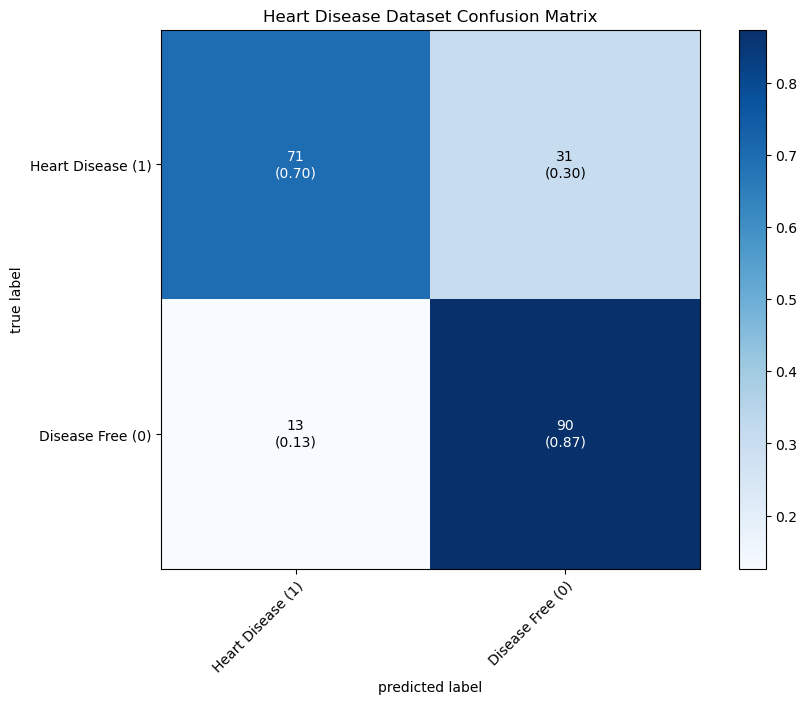

In [21]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Setup confusion matrix instance and compare predictions to targets
confmat = confusion_matrix(y_test, y_pred)
        
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
                 conf_mat=confmat,          # inputs the confusion matrix plotting values to the MlXtend method
                 class_names=names,         # turn the row and column labels into class names
                 figsize=(10, 7),           # sets the confusion matrix figure size to 10 x 7
                 show_normed=True,          # displays the proportion of training examples per class on the confusion matrix plot
                 colorbar=True              # adds the colour bar to the confusion matrix plot
);
        
# Confusion matrix title
plt.title("Heart Disease Dataset Confusion Matrix")

# Displays the Confusion Matrix heat map plot
plt.show()

# 8. Test on the ScikitLearn Logistic Regression Mode

In [22]:
# Imports the Logistc Regression model from ScikitLearn
from sklearn.linear_model import LogisticRegression

# Trains the ScikitLEarn Logistic Regression model
model = LogisticRegression().fit(X_train, y_train)

# 9. Make Predictions

In [23]:
# Makes predictions on the Logistic Regression model
y_pred = model.predict(X_test)

y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [24]:
# Flattens the 2D pred array to 1D from the model and stores it in the flat Python variable
flat = y_pred.flatten()

flat

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [25]:
# Prints out the y_test variable to the screen
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [26]:
# Flattens the y_test 2D array to 1D and stores it in the y variable
y = y_test.values.flatten()

y

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

# 10. Test the ScikitLearn Logistic Regression Mode

In [27]:
from sklearn.metrics import accuracy_score
        
# Calls the accuracy method from ScikitLearn
acc = accuracy_score(y_pred, y)

# Prints out the accuracy score of the Logistic Regression model to the screen
print("Accuracy: ", acc)

Accuracy:  0.7951219512195122


In [28]:
from sklearn.metrics import precision_score
        
# Calls the precision method from ScikitLearn
pre = precision_score(y_pred, y)

# Prints out the precision score of the Logistic Regression model to the screen
print("Precision: ", pre)

Precision:  0.8737864077669902


In [29]:
from sklearn.metrics import recall_score

# Calls the recall method from ScikitLearn
rec = recall_score(y_pred, y)

# Prints out the recall score of the Logistic Regression model to the screen
print("Recall: ", rec)

Recall:  0.7563025210084033


In [30]:
from sklearn.metrics import f1_score

# Calls the F1 score method from ScikitLearn
f_one = f1_score(y_pred, y)

# Prints out the F1 score of the Logistic Regression model to the screen
print("F1 Score: ", f_one)

F1 Score:  0.8108108108108107


In [31]:
from sklearn.metrics import classification_report

# Displays the classification report for the deep neural network to the screen
cr = classification_report(y_test, y, target_names=names)
print(cr)

                   precision    recall  f1-score   support

Heart Disease (1)       1.00      1.00      1.00       102
 Disease Free (0)       1.00      1.00      1.00       103

         accuracy                           1.00       205
        macro avg       1.00      1.00      1.00       205
     weighted avg       1.00      1.00      1.00       205



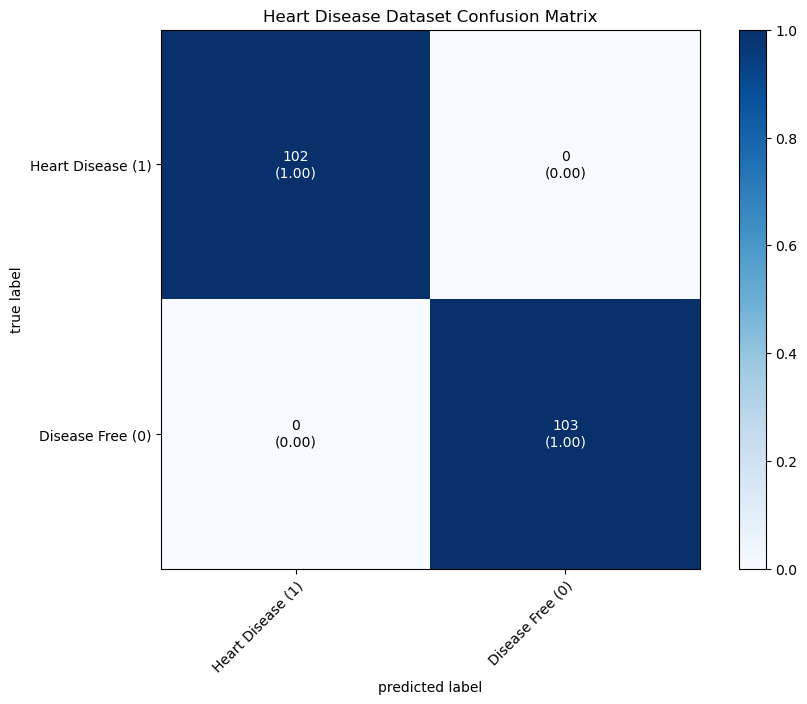

In [32]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = confusion_matrix(y_test, y)
        
# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
                 conf_mat=confmat,          # inputs the confusion matrix plotting values to the MlXtend method
                 class_names=names,         # turn the row and column labels into class names
                 figsize=(10, 7),           # sets the confusion matrix figure size to 10 x 7
                 show_normed=True,          # displays the proportion of training examples per class on the confusion matrix plot
                 colorbar=True              # adds the colour bar to the confusion matrix plot
);
        
# Confusion matrix title
plt.title("Heart Disease Dataset Confusion Matrix")

# Displays the Confusion Matrix heat map plot
plt.show()

# 11. Display Jupyter Notebook Python Variables

In [33]:
# Prints out all the Python variables from the Jupyter Notebook
%whos

Variable                Type                  Data/Info
-------------------------------------------------------
LogisticRegression      type                  <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
X                       DataFrame                        age       sex <...>n[1025 rows x 13 columns]
X_test                  DataFrame                       age       sex  <...>\n[205 rows x 13 columns]
X_train                 DataFrame                       age       sex  <...>\n[820 rows x 13 columns]
acc                     float64               0.7951219512195122
accuracy_score          function              <function accuracy_score at 0x7f40ee6bd4e0>
ax                      Axes                  Axes(0.206,0.11;0.539x0.77)
classification_report   function              <function classification_<...>report at 0x7f40ee6bdee0>
confmat                 ndarray               2x2: 4 elems, type `int64`, 32 bytes
confusion_matrix        function              <function confusion_